<font size=5 > <p style="color:purple"> Estimating the Price of Health Insurance?

<img src="https://i.imgur.com/zTnvOcb.jpg" width="800">

<font size='2'>Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

* **age:** age of primary beneficiary

* **sex:** insurance contractor gender, female, male

* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** Smoking

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

<font size=5><p style="color:purple"> EDA and Visualizations 

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew
import scipy.stats as stats
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv('insurance.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,19,18,28,33,32,31,46,37,37,60,25,62,23,56,27,19,52,23,56,30,60,30,18,34,37,59,63,55,23,31,22,18,19,63,28,19,62,26,35,60,24,31,41,37,38,55,18,28,60,36,18,21,48,36,40,58,58,18,53,34,43,25,64,28,20,19,61,40,40,28,27,31,53,58,44,57,29,21,22,41,31,45,22,48,37,45,57,56,46,55,21,53,59,35,64,28,54,55,56,38,41,30,18,61,34,20,19,26,29,63,54,55,37,21,52,60,58,29,49,37,44,18,20,44,47,26,19,52,32,38,59,61,53,19,20,22,19,22,54,22,34,26,34,29,30,29,46,51,53,19,35,48,32,42,40,44,48,18,30,50,42,18,54,32,37,47,20,32,19,27,63,49,18,35,24,63,38,54,46,41,58,18,22,44,44,36,26,30,41,29,61,36,25,56,18,19,39,45,51,64,19,48,60,27,46,28,59,35,63,40,20,40,24,34,45,41,53,27,26,24,34,53,32,19,42,55,28,58,41,47,42,59,19,59,39,40,18,31,19,44,23,33,55,40,63,54,60,24,19,29,...,52,56,47,55,23,22,50,18,51,22,52,25,33,53,29,58,37,54,49,50,26,45,54,38,48,28,23,55,41,25,33,30,23,46,53,27,23,63,55,35,34,19,39,27,57,52,28,50,44,26,33,19,50,41,52,39,50,52,60,20,55,42,18,58,43,35,48,36,19,23,20,32,43,34,30,18,41,35,57,29,32,37,18,43,56,38,29,22,52,40,23,31,42,24,25,48,23,45,20,62,43,23,31,41,58,48,31,19,19,41,40,31,37,46,22,51,18,35,59,36,37,59,36,39,18,52,27,18,40,29,46,38,30,40,50,20,41,33,38,42,56,58,52,20,54,58,45,26,63,58,37,25,52,64,22,28,18,28,45,33,18,32,24,19,20,40,34,42,51,54,55,52,32,28,41,43,49,64,55,24,20,45,26,25,43,35,26,57,22,32,39,25,48,47,18,18,61,47,28,36,20,44,38,19,21,46,58,20,18,28,33,19,45,62,25,43,42,24,29,32,25,41,42,33,34,19,30,18,19,18,35,39,31,62,62,42,31,61,42,51,23,52,57,23,52,50,18,18,21,61
sex,female,male,male,male,male,female,female,female,male,female,male,female,male,female,male,male,female,male,male,male,female,female,male,female,male,female,female,female,male,male,male,female,female,male,male,male,female,male,male,male,female,female,male,female,male,male,female,female,female,male,female,female,male,male,female,male,female,male

In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# There is no missing value. Lets look at the types of the columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<font size=5><p style="color:purple"> Feature Engineering

In [8]:
df.select_dtypes("object").head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [9]:
for col in df.select_dtypes('object').columns:
    print(f"{col:<20}:", df[col].nunique())

sex                 : 2
smoker              : 2
region              : 4


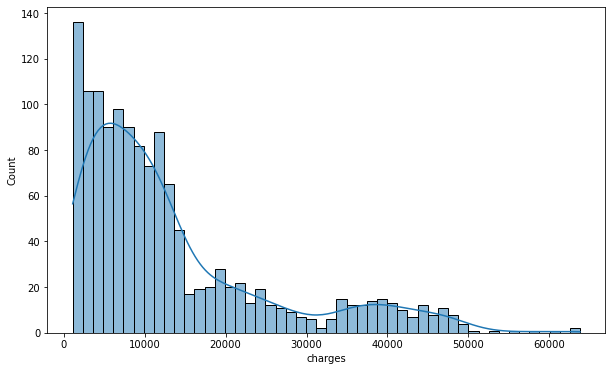

In [10]:
sns.histplot(df.charges, bins = 50, kde=True);

In [11]:
skew(df.charges) # We can see that it is right skewed

1.5141797118745743

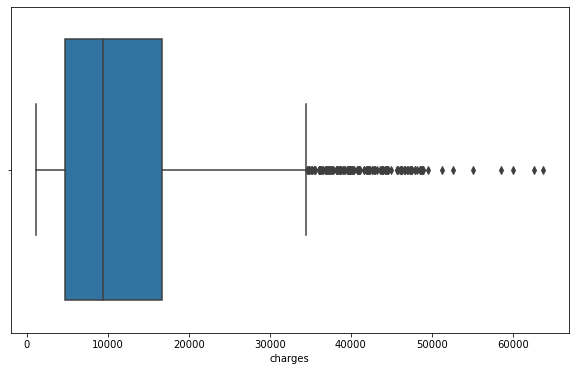

In [12]:
sns.boxplot(df.charges);
#Buradaki outlier'lar faydali mi degil mi analiz etmemiz gerekir.

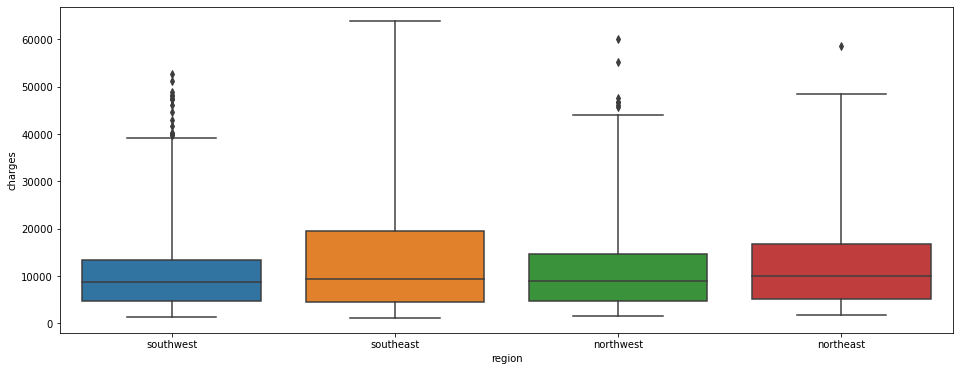

In [13]:
plt.figure(figsize=(16,6))
sns.boxplot(x="region", y="charges", data=df, whis=3)
plt.show()

In [14]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


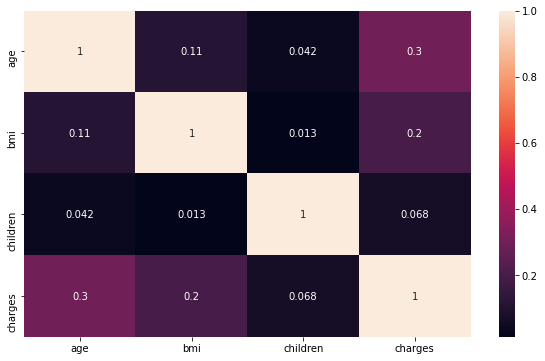

In [15]:
sns.heatmap(df_numeric.corr(), annot=True);

<font size=5><p style="color:purple"> Checking Multicollinearity

In [16]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any()

age         False
bmi         False
children    False
charges     False
dtype: bool

In [17]:
df_numeric.corr()[(df_numeric.corr() <= -0.9) & (df_numeric.corr() > -1)].any()
# 0.9'dan büyük ve 1'den kücük olanlara bakip multicollinarity olmadigini gördük.

age         False
bmi         False
children    False
charges     False
dtype: bool

<font size=5><p style="color:purple"> Get Dummies

In [18]:
df = pd.get_dummies(df, drop_first =True) 

In [19]:
df.shape

(1338, 9)

In [20]:
df.isnull().any()

age                 False
bmi                 False
children            False
charges             False
sex_male            False
smoker_yes          False
region_northwest    False
region_southeast    False
region_southwest    False
dtype: bool

In [21]:
df.head() # Drop first dedigimiz icin sex_female, smoker_no ve region_northeast olusmadi.

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [22]:
corr_by_charges = df.corr()["charges"].sort_values()[:-1]
corr_by_charges

region_southwest   -0.043210
region_northwest   -0.039905
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
Name: charges, dtype: float64

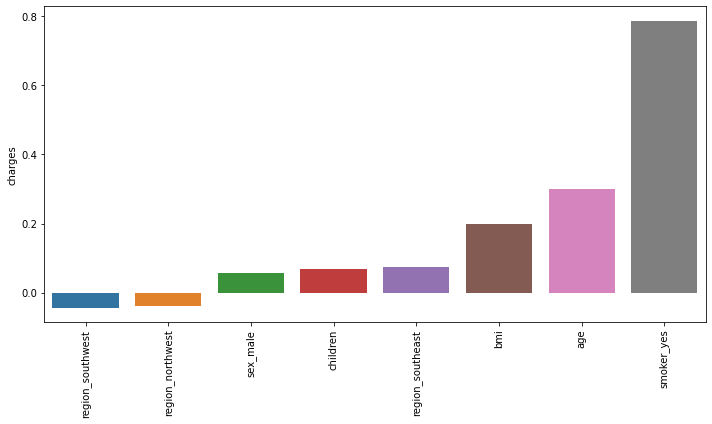

In [23]:
plt.figure(figsize = (10,6))
sns.barplot(x = corr_by_charges.index, y = corr_by_charges)
plt.xticks(rotation=90)
plt.tight_layout();

<font size=5><p style="color:purple"> Train-Test Split

The data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, we need to split the data set as train and test. Then, we should train the model with train data and evaluate the performance of the model on the test data. 

We must also drop our target variable, the column we are trying to predict.

In [24]:
X = df.drop("charges", axis =1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(1070, 8)

In [26]:
X_test.shape

(268, 8)

<font size=5><p style="color:purple"> Implementing Linear Regression


 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

In [27]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [28]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [31]:
pd.options.display.float_format = '{:.3f}'.format

In [32]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.742,0.784
mae,4208.235,4181.194
mse,37277681.702,33596915.851
rmse,6105.545,5796.285


<font size='2' font>The result we got is not good enough: Maybe underfitting. We should try to improve it 

<font size=5><p style="color:purple">Cross Validate 

In [33]:
#Datasetimizin farkli yerlerinden train sample'lari alarak daha realist sonuc almak icin CV yapilir.
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [34]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.005,0.005,0.735,-4195.446,-36893475.666,-6074.000
1,0.004,0.005,0.697,-4484.746,-43307871.905,-6580.872
2,0.005,0.002,0.819,-3910.555,-27392943.336,-5233.827
3,0.002,0.004,0.785,-4573.393,-36545076.535,-6045.252
4,0.001,0.000,0.786,-3929.085,-34064321.211,-5836.465
5,0.000,0.000,0.625,-4226.570,-37545462.853,-6127.435
6,0.000,0.018,0.610,-5111.302,-53014180.372,-7281.084
7,0.003,0.002,0.706,-4189.795,-39961704.415,-6321.527
8,0.003,0.003,0.755,-4038.430,-38357145.092,-6193.315
9,0.003,0.003,0.779,-3779.913,-31776479.234,-5637.063


In [35]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.730
test_neg_mean_absolute_error           -4243.923
test_neg_mean_squared_error        -37885866.062
test_neg_root_mean_squared_error       -6133.084
dtype: float64

In [36]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7835929767120723
MAE 		: 4181.194473753653
MSE 		: 33596915.85136146
RMSE 		: 5796.2846592762735


In [37]:
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

<font size=5><p style="color:purple">Scaling 

In [38]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
#X-test'i kesinlikle tekrar etmiyoruz scalingde.
X_test = scaler.transform(X_test)

In [39]:
X_train

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [40]:
X_test

array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.84611246, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.49071832, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

<font size=5><p style="color:purple">Polyregression

In [41]:
from sklearn.preprocessing import PolynomialFeatures
def poly(d):
    
    test_rmse_errors = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias = False)
        poly_features = polynomial_converter.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
        
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train) 
        X_test_scaled = scaler.transform(X_test)
        poly = LinearRegression(fit_intercept=True)
        poly.fit(X_train_scaled, y_train)

        y_train_pred_poly = poly.predict(X_train_scaled)
        y_test_pred_poly = poly.predict(X_test_scaled)
        test_RMSE = np.sqrt(mean_squared_error(y_test,y_test_pred_poly))
        #print(test_RMSE)

        test_rmse_errors.append(test_RMSE)
    
    min_rmse = min(test_rmse_errors)
    
    return test_rmse_errors.index(min_rmse)

poly(5)

1

In [42]:
# We got that the best degree with minimum rmse is with degree = 2
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False)
poly_features = polynomial_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
poly = LinearRegression(fit_intercept=True)
poly.fit(X_train_scaled, y_train)

y_train_pred_poly = poly.predict(X_train_scaled)
y_test_pred_poly = poly.predict(X_test_scaled)
test_RMSE = np.sqrt(mean_squared_error(y_test,y_test_pred_poly))
print(test_RMSE)
poly = train_val(y_train, y_train_pred_poly, y_test, y_test_pred_poly)
poly

4553.251880145748


,train_set,test_set
R2,0.841,0.866
mae,2919.829,2770.457
mse,23011550.103,20732102.684
rmse,4797.036,4553.252


In [43]:
plm_R2 = r2_score(y_test, y_test_pred_poly)
plm_mae = mean_absolute_error(y_test, y_test_pred_poly)
plm_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))



<font size=5><p style="color:purple"> Implementing Ridge Regression 

In [44]:
from sklearn.linear_model import Ridge, RidgeCV
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
y_train_pred = ridge_model.predict(X_train)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.842,0.867
mae,2889.165,2729.409
mse,22849206.563,20656391.239
rmse,4780.084,4544.930


In [45]:
# Finding best Alpha for Ridge

In [46]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [47]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring='neg_root_mean_squared_error')
#  Gridsearch de kullanilabilir burada fakar ridgecv de kullanilabilir. Ayni sonucu verir.

In [48]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [49]:
ridge_cv_model.alpha_
# Alpha 0 olsaydi lineer regression ile aynisi cikardi.

0.15454545454545454

In [50]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [51]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.842,0.867
mae,2891.221,2729.399
mse,22831593.831,20700917.799
rmse,4778.242,4549.826


In [52]:
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [53]:
#pd.DataFrame(ridge_cv_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

In [54]:
# Ridge'de coefficient'lar 0'lanmaz ama önemsizlik derecesine göre 0'a cok yaklastirilir.

<font size=5><p style="color:purple"> Implementing Lasso Regression 

In [55]:
from sklearn.linear_model import Lasso, LassoCV
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_pred = lasso_model.predict(X_test)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.842,0.867
mae,2892.464,2726.965
mse,22832412.083,20680270.905
rmse,4778.327,4547.557


In [56]:
#Finding best Alpha for Lasso

In [57]:
lasso_cv_model = LassoCV(alphas = alpha_space,  cv = 10, max_iter = 100000, n_jobs =-1).fit(X_train, y_train)
lasso_cv_model.alpha_


1.0

In [58]:
y_train_pred = lasso_cv_model.predict(X_train)
y_pred = lasso_cv_model.predict(X_test)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.842,0.867
mae,2892.340,2728.635
mse,22832686.482,20673886.417
rmse,4778.356,4546.855


In [59]:
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [60]:
#pd.DataFrame(lasso_cv_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")
#Lasso'nun Ridge'den farki bazi coeeficient'lari 0'lara cekmesidir. Ayni sonucu veriyorsa da avantajlidir. Cünkü ayni sonucu daha az feature ile bulabiliriz.

<font size=5><p style="color:purple"> Implementing Elastic-Net

In [61]:
from sklearn.linear_model import ElasticNet
#ElasticNet ile Ridge ve Lasso arasinda optimizasyon yapiyoruz: l1_ratio=1 ise Lasso ile ayni sonuclar bulunur.
#l1_ratio = 0.5 ise hem Ridge'den hem de Lasso'dan faydalanir.
elastic_model = ElasticNet()
elastic_model.fit(X_train,y_train)
y_train_pred = elastic_model.predict(X_train)
y_pred = elastic_model.predict(X_test)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.824,0.860
mae,3074.796,2906.309
mse,25330625.436,21668352.245
rmse,5032.954,4654.928


<font size=5><p style="color:purple"> Finding best alpha and l1_ratio for ElasticNet

In [62]:
from sklearn.model_selection import GridSearchCV
#GridsearchCV ile hyperparametre iyilestirmesi yapilir.
elastic_model = ElasticNet()
param_grid = {'alpha':alpha_space,
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

In [63]:
grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [64]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.3363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [65]:
grid_model.best_estimator_

ElasticNet(l1_ratio=1)

In [66]:
y_train_pred = grid_model.predict(X_train)
y_pred = grid_model.predict(X_test)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.842,0.867
mae,2892.464,2726.965
mse,22832412.083,20680270.905
rmse,4778.327,4547.557


In [67]:
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

<font size=5><p style="color:purple"> Feature Importance

In [68]:
df = pd.read_csv('insurance.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,19,18,28,33,32,31,46,37,37,60,25,62,23,56,27,19,52,23,56,30,60,30,18,34,37,59,63,55,23,31,22,18,19,63,28,19,62,26,35,60,24,31,41,37,38,55,18,28,60,36,18,21,48,36,40,58,58,18,53,34,43,25,64,28,20,19,61,40,40,28,27,31,53,58,44,57,29,21,22,41,31,45,22,48,37,45,57,56,46,55,21,53,59,35,64,28,54,55,56,38,41,30,18,61,34,20,19,26,29,63,54,55,37,21,52,60,58,29,49,37,44,18,20,44,47,26,19,52,32,38,59,61,53,19,20,22,19,22,54,22,34,26,34,29,30,29,46,51,53,19,35,48,32,42,40,44,48,18,30,50,42,18,54,32,37,47,20,32,19,27,63,49,18,35,24,63,38,54,46,41,58,18,22,44,44,36,26,30,41,29,61,36,25,56,18,19,39,45,51,64,19,48,60,27,46,28,59,35,63,40,20,40,24,34,45,41,53,27,26,24,34,53,32,19,42,55,28,58,41,47,42,59,19,59,39,40,18,31,19,44,23,33,55,40,63,54,60,24,19,29,...,52,56,47,55,23,22,50,18,51,22,52,25,33,53,29,58,37,54,49,50,26,45,54,38,48,28,23,55,41,25,33,30,23,46,53,27,23,63,55,35,34,19,39,27,57,52,28,50,44,26,33,19,50,41,52,39,50,52,60,20,55,42,18,58,43,35,48,36,19,23,20,32,43,34,30,18,41,35,57,29,32,37,18,43,56,38,29,22,52,40,23,31,42,24,25,48,23,45,20,62,43,23,31,41,58,48,31,19,19,41,40,31,37,46,22,51,18,35,59,36,37,59,36,39,18,52,27,18,40,29,46,38,30,40,50,20,41,33,38,42,56,58,52,20,54,58,45,26,63,58,37,25,52,64,22,28,18,28,45,33,18,32,24,19,20,40,34,42,51,54,55,52,32,28,41,43,49,64,55,24,20,45,26,25,43,35,26,57,22,32,39,25,48,47,18,18,61,47,28,36,20,44,38,19,21,46,58,20,18,28,33,19,45,62,25,43,42,24,29,32,25,41,42,33,34,19,30,18,19,18,35,39,31,62,62,42,31,61,42,51,23,52,57,23,52,50,18,18,21,61
sex,female,male,male,male,male,female,female,female,male,female,male,female,male,female,male,male,female,male,male,male,female,female,male,female,male,female,female,female,male,male,male,female,female,male,male,male,female,male,male,male,female,female,male,female,male,male,female,female,female,male,female,female,male,male,female,male,female,male

In [69]:
df_new = df[["age", "bmi", "children","smoker", "charges"]]
df_new

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.924
1,18,33.770,1,no,1725.552
2,28,33.000,3,no,4449.462
3,33,22.705,0,no,21984.471
4,32,28.880,0,no,3866.855
...,...,...,...,...,...
1333,50,30.970,3,no,10600.548
1334,18,31.920,0,no,2205.981
1335,18,36.850,0,no,1629.833
1336,21,25.800,0,no,2007.945


In [70]:
df_new = pd.get_dummies(df_new)
df_new

,age,bmi,children,charges,smoker_no,smoker_yes
0,19,27.900,0,16884.924,0,1
1,18,33.770,1,1725.552,1,0
2,28,33.000,3,4449.462,1,0
3,33,22.705,0,21984.471,1,0
4,32,28.880,0,3866.855,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.548,1,0
1334,18,31.920,0,2205.981,1,0
1335,18,36.850,0,1629.833,1,0
1336,21,25.800,0,2007.945,1,0


In [71]:
X = df_new.drop(columns = ["charges"])
y= df_new.charges
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
#Artik tüm veriyi kullanarak modeli egitiyoruz.
#En iyi modelimizin Lasso oldugunu yukarida ögrendigimizden dolayi, lasso uyguluyoruz.
lasso_final_model = LassoCV(alphas = alpha_space, max_iter = 100000, cv =10)
lasso_final_model.fit(X_train, y_train)
lasso_final_model.alpha_

0.1

In [73]:
y_train_pred = lasso_final_model.predict(X_train)
y_pred = lasso_final_model.predict(X_test)
train_val(y_train, y_train_pred, y_test, y_pred)
# 4 Feature ile %76 oraninda tahmin edebiliyoruz. Burada Trade-Off var: 6 adet feature ile % 87 mi? Yoksa 4 feature ile % 77 mi?

,train_set,test_set
R2,0.741,0.768
mae,4254.357,4167.892
mse,37883135.155,33948691.297
rmse,6154.928,5826.551


In [ ]:
#I havent selected this method with less features, because there is an important difference between them. %77 to %87

In [74]:
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

<font size=5><p style="color:purple"> Comparison of Models Performance

In [75]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},
          
 "poly_m": {"r2_score": plm_R2 , 
 "mae": plm_mae, 
 "rmse": plm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse} }

scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.784,4181.194,5796.285
poly_m,0.866,2770.457,4553.252
ridge_m,0.867,2729.399,4549.826
lasso_m,0.867,2728.635,4546.855
elastic_m,0.867,2726.965,4547.557


<font size=5><p style="color:purple"> Prediction of new observation

In [76]:
df = df.drop("charges", axis =1)
X = pd.get_dummies(df, drop_first =True) 
columns_name = X.columns
columns_name

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [77]:
#Deployment öncesi son egitimi tüm data ile yapiyorum. 
#Cünkü tüm analizlerim yukarida yapildi.Artik en iyi modeli bildigim icin direkt onu uyguluyorum.
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X = final_scaler.transform(X)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X,y)

Lasso()

In [78]:
my_dict = {
    "age": 27,
    "sex":"female",
    "bmi": 23,
    "children": 4,
    "smoker": 'yes',
    "Region": "Southwest"    
}

In [79]:
my_dict = pd.DataFrame([my_dict])
my_dict

,age,sex,bmi,children,smoker,Region
0,27,female,23,4,yes,Southwest


In [80]:
my_dict = pd.get_dummies(my_dict)
my_dict

,age,bmi,children,sex_female,smoker_yes,Region_Southwest
0,27,23,4,1,1,1


In [81]:
my_dict = my_dict.reindex(columns=columns_name, fill_value=0)
my_dict

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,27,23,4,0,1,0,0,0


In [82]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.19565217, 0.18940005, 0.8       , 0.        , 1.        ,
        0.        , 0.        , 0.        ]])

In [83]:
lasso_model.predict(my_dict)

array([28527.53609336])

<font size=2> **Conclusion:**  **Lasso Regression** turned out to be the best model, and the model is ready to predict. Maybe with a interface, we could get the fetures from user and we would give the estimation.